___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Ana Rosaura Zamarrón Álvarez </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `ana.zamarron@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg</p>

### <font color= #2E9AFE> Tema: XGBoost - Regresión</font>

Los datos los podemos obtener de: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

Columnas disponibles:
- AT: Atmospheric Temperature in C
- V: Exhaust Vacuum Speed
- AP: Atmospheric Pressure
- RH: Relative Humidity
- PE: Power Output

Power output (energía) es la variable a predecir

In [1]:
#Librerías
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#Cargar datos
datos = pd.read_excel("Folds5x2_pp.xlsx")

In [3]:
datos.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
datos.shape

(9568, 5)

In [5]:
datos.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [6]:
#No hay datos nulos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


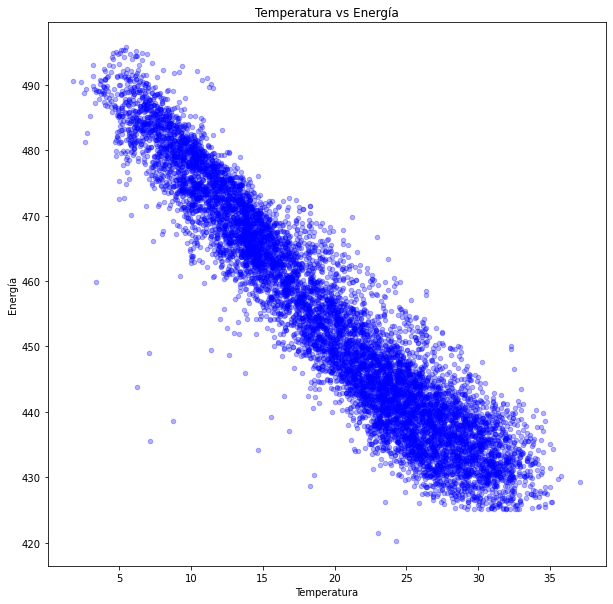

In [7]:
# Relación entre variable de salida y la temperatura
datos.plot(x ='AT', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Temperatura vs Energía")
plt.xlabel("Temperatura") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación positiva entre la temperatura y la energía

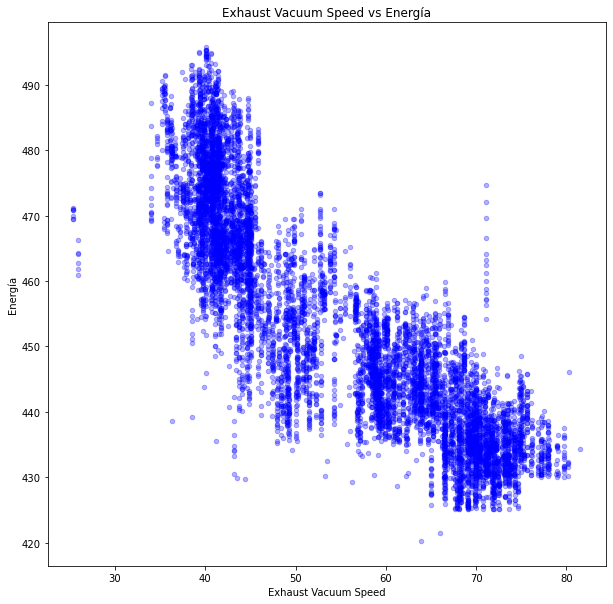

In [8]:
# Relación entre variable de salida y el Exhaust Vacuum Speed
datos.plot(x ='V', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Exhaust Vacuum Speed vs Energía")
plt.xlabel("Exhaust Vacuum Speed") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación positiva entre la temperatura y el Exhaust Vacuum Speed

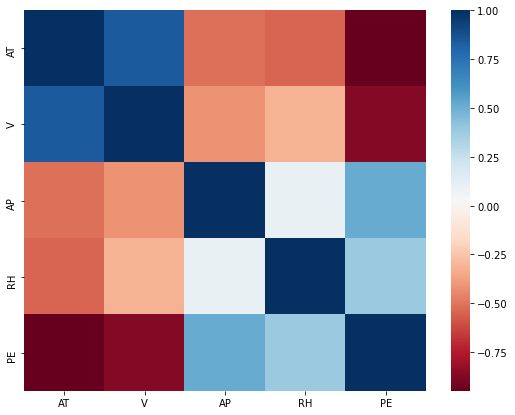

In [9]:
# gráfico de correlacion
corr = datos.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(corr, cmap="RdBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [10]:
#Separar nuestras X de las Y
X = datos.drop("PE", axis = 1).values
y = datos['PE'].values
y = y.reshape(-1, 1)

#Dividiendo los datos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size = 0.2, 
                                               random_state=42)



In [11]:
#Construir el xgboost
#inicializar objeto de regresión
modelo = xgb.XGBRegressor(objective='reg:linear', seed=42)
#Entrenar modelo
modelo.fit(X_train, y_train)

[16:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [12]:
import sklearn.metrics as metrics
y_hat= modelo.predict(X_test)
r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print('R2:',r2)
print("MSE:",mse)

R2: 0.9681464446561965
MSE: 9.239377916017855


Ahora optimizamos parámetros con grid search y utilizamos cross validation

In [13]:
#Parámetros para el grid search
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 200],
     'max_depth': [10, 15, 20, 25]
}
#Iniciar el modelo
gbm = xgb.XGBRegressor()

#Hacer el grid search
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
#Ajustar a los datos de entrenamiento
grid_mse.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados: ",grid_mse.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Mejores hiperparámetros encontrados:  {'colsample_bytree': 0.8, 'max_depth': 10, 'n_estimators': 200}


In [14]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modelo_nuevo = xgb.XGBRegressor(objective='reg:linear',
                            seed=42,
                           max_depth=10,
                           colsample_bytree=0.8,
                            n_estimators=200)

modelo_nuevo.fit(X_train, y_train)

[16:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [15]:
y_hat= modelo_nuevo.predict(X_test)
r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print('R2:',r2)
print("MSE:",mse)

R2: 0.969865544207637
MSE: 8.740739372860501
